## Preamble

This notebook uses two of the three data sets available from Thinknum (https://www.thinknum.com/) in collaboration with The Data Incubator (https://www.thedataincubator.com/) containing companies' digital activities.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yfinance as yf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import difflib
from difflib import SequenceMatcher

## Facebook Data

In [2]:
df_face = pd.read_csv('./data/facebook/datalab_records_social_facebook.csv', dtype={'talking_about_count':int})
print(df_face.shape)
df_face.head()

C:\Users\Michael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3621391, 14)


,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


The column `time` includes information on hours, minutes, and seconds but the only values represented are `04:00:00+00` and `05:00:00+00` which is not very informative. The feature `time` will be converted to datetime and only the date part will be retained. In addition, `username` will be converted to lowercase.

In [3]:
df_face['time'] = pd.to_datetime(df_face['time'].str[:10], format='%Y-%m-%d')
df_face['username'] = df_face['username'].str.lower()

In [4]:
# percent missing values in columns
df_face.isna().sum()/len(df_face)*100

dataset_id               0.000000
time                     0.000000
username                 3.339297
checkins                 0.000000
has_added_app            0.000000
were_here_count          0.000000
likes                    0.000000
talking_about_count      0.000000
facebook_id              0.000000
date_added              42.035919
date_updated             0.037665
entity_id              100.000000
cusip                  100.000000
isin                   100.000000
dtype: float64

In [5]:
# drop columns with no useful data
df_face.drop(columns=['date_added', 'entity_id', 'cusip', 'isin'], inplace=True)

## LinkedIn Data

In [6]:
df_linked = pd.read_csv('./data/linkedin/datalab_records_linkedin_company.csv',
                        dtype={'date_added':object, 'date_updated':object})
print(df_linked.shape)
df_linked.head()

C:\Users\Michael\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2426196, 14)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [7]:
df_linked['as_of_date'] = pd.to_datetime(df_linked['as_of_date'], format='%Y-%m-%d')
df_linked['company_name'] = df_linked['company_name'].str.lower()

In [8]:
# percent missing values in columns
df_linked.isna().sum()/len(df_linked)*100

dataset_id                 0.000000
as_of_date                 0.000000
company_name               0.000000
followers_count            0.000000
employees_on_platform      0.000000
link                       0.000000
industry                   1.494727
date_added                 0.000000
date_updated               0.000000
description               75.232092
website                   79.794501
entity_id                100.000000
cusip                    100.000000
isin                     100.000000
dtype: float64

In [9]:
# drop columns with too many nans
df_linked.drop(columns=['description', 'website', 'entity_id', 'cusip', 'isin'], inplace=True)

In [10]:
# Date ranges for the datasets
print('Facebook:', df_face['time'].min(), df_face['time'].max())
print('Linkedin:', df_linked['as_of_date'].min(), df_linked['as_of_date'].max())

Facebook: 2015-01-01 00:00:00 2018-07-17 00:00:00
Linkedin: 2015-09-14 00:00:00 2018-07-17 00:00:00


NB: Should we want to combine the two data sets, the lower limit for `date` is September 14, 2015 while the upper limit is July 17, 2018.

The company names in the two data sets are not the same and if we want to merge the two dataframes it might be beneficial to find matches between the `username` column in the Facebook data set and the `company_name` column in the LinkedIn data set.

Below is given an example how matching company names may be found. This example will be replaced with a full comparison later.

In [11]:
# Get top company names based on talking_about_cnt
top_fb_names = df_face.groupby(['username'])['talking_about_count'].\
                sum().sort_values(ascending=False).nlargest(100)
top_fb_names = top_fb_names.index.tolist()

all_li_names = df_linked['company_name']
all_li_names = set(all_li_names.tolist())

for uname in top_fb_names:
    matches = difflib.get_close_matches(uname, all_li_names, 4, 0.75)
    if len(matches) > 0:
        print(uname, 'matches:', matches)

manchesterunited matches: ['manchester united']
wwe matches: ['wwe']
usatoday matches: ['usa today']
yahoo matches: ['yahoo']
netflix matches: ['netflix']
facebook matches: ['facebook']
monsterenergy matches: ['monster energy', 'consumers energy']
westernunion matches: ['western union']
nordstrom matches: ['nordstrom']
nike matches: ['nike']
starbucks matches: ['starbucks', 'star bulk']
youtube matches: ['youtube']
amazon matches: ['amazon', 'aaon']
icicibank matches: ['icici bank']
slate matches: ['solaytec']
walmart matches: ['walmart']
mercadolibre matches: ['mercado libre', 'mercadolibre.com']
livenation matches: ['live nation']
bet matches: ['bt']
target matches: ['target', 'techtarget']
detroitfreepress matches: ['detroit free press']
macys matches: ["macy's"]
wayfair matches: ['wayfair']
aol matches: ['aol', 'sasol']
spotify matches: ['spotify']
intel matches: ['mitel', 'intec', 'intelsat']
kohls matches: ["kohl's"]
michaelkors matches: ['michael kors', 'michael foods']
google m

The cutoff ratio was set at 0.75 (but may be changed later) in order to assess what kind of matches are returned. As shown above, a fair number of companies with a presence on facebook can be matched with a single match found in the LinkedIn data such as `walmart` and `google`. It can be seen that some companies, such as `michaelkors` return more than 1 match from LinkedIn (`michael kors` and `michael foods`). This should be easily ameliorated by increasing the cutoff.  

A more important matching challenge is presented when there are more than two matches and two (or more) of those matches are likely to belong to the same company. For example, the username `mercadolibre` in the Facebook data set matches both `mercado libre` and `mercadolibre.com` in the LinkedIn dataset. It should be noted that the best matches are returned sorted by similarity score with most similar first. Thus, one could select the first one of the matches from the LinkedIn data set and use that as the pattern to be replaced with the name from the Facebook data set.

## Data Exploration - Facebook

Here, we will perform some initial data exploration on a single company. This will be expanded to all companies for which data is available in both data sets and the approach will be streamlined. It will be necessary to get the stock symbols for each selected company programmatically. This could be done by submitting a query using Google's API and selecting the symbol from the appropriate field in the query result.

In [12]:
# Find company starting with ...
df_face[df_face['username'].str.startswith('ans', na=False)]['username'].unique()

array(['ansysinc', 'ansiblemobile'], dtype=object)

In [13]:
# Get date limits for company
print('Min date:', df_face[df_face['username'] == 'ansysinc']['time'].min())
print('Max date:', df_face[df_face['username'] == 'ansysinc']['time'].max())

Min date: 2015-01-01 00:00:00
Max date: 2018-07-17 00:00:00


In [14]:
# get stock prices for a company (Ansys Inc.)
def get_stock_prices(symbol, start_date, end_date):
    res = yf.download(symbol, start=start_date, end=end_date)
    return res

stock_anss = get_stock_prices('ANSS', '2015-01-01', '2018-07-17')
stock_anss.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,82.09,82.63,81.02,81.64,81.64,282600
2015-01-05,81.29,82.07,80.78,80.86,80.86,321500
2015-01-06,81.00,81.14,78.76,79.26,79.26,344300
2015-01-07,79.92,80.90,78.96,79.71,79.71,233300
2015-01-08,80.11,82.16,80.11,81.66,81.66,429900


NB: Stock prices will not available for weekends and holidays. As such, it will be necessary to perform a left outer join using `Close` in the stock price dataframe and `time` in the Facebook data set or `as_of_date` in the LinkedIn data set.

In [15]:
df_ansys = df_face[df_face['username'] == 'ansysinc'].copy()
df_merged = stock_anss.merge(df_ansys, how='left', left_index=True, right_on='time')

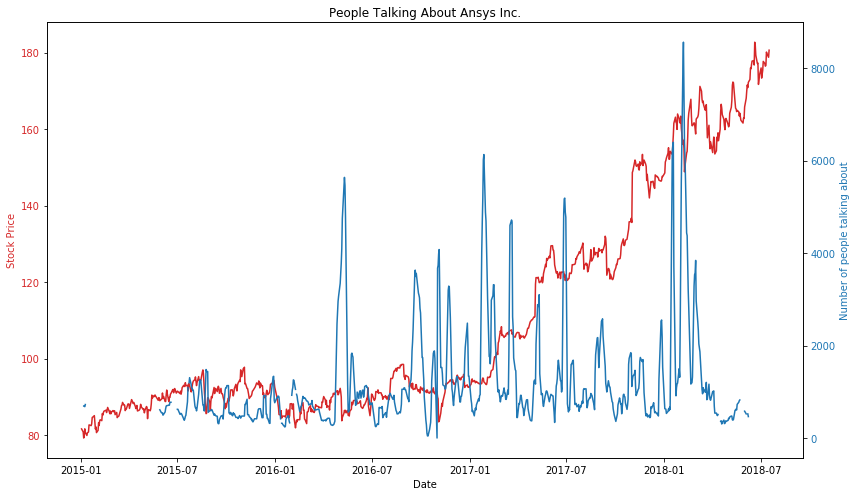

In [16]:
fig, ax1 = plt.subplots(figsize=(12,7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.title.set_text('People Talking About Ansys Inc.')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(df_merged['time'], df_merged['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of people talking about', color=color)
ax2.plot(df_merged['time'], df_merged['talking_about_count'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.savefig('Talking about Ansys');

For a discussion of the above graph, please visit https://annumveritas-digitaldatatrails.blogspot.com/

Additional data visualizations.

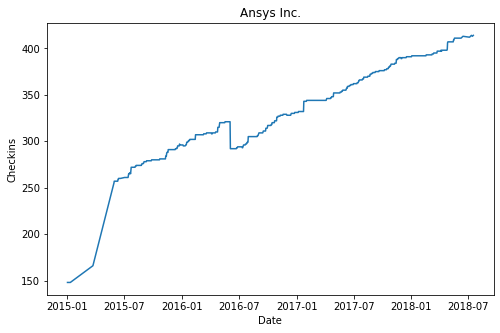

In [17]:
plt.figure(figsize=(8,5))
x = df_face[df_face['username']=='ansysinc']['time']
y = df_face[df_face['username']=='ansysinc']['checkins']
plt.title('Ansys Inc.')
plt.xlabel('Date')
plt.ylabel('Checkins')
plt.plot(x, y);

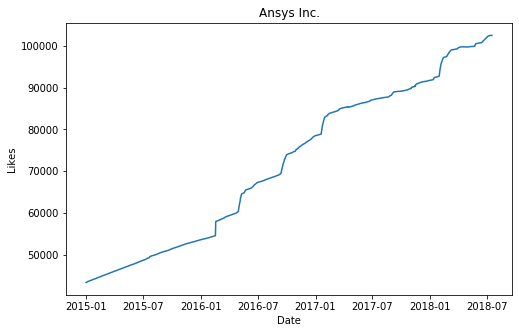

In [18]:
plt.figure(figsize=(8,5))
x = df_face[df_face['username']=='ansysinc']['time']
y = df_face[df_face['username']=='ansysinc']['likes']
plt.title('Ansys Inc.')
plt.xlabel('Date')
plt.ylabel('Likes')
plt.plot(x, y);

The number of `check-ins` and `likes` continues to increase with time.

## Data Exploration - Linkedin

In [19]:
# Find company starting with ...
df_linked[df_linked['company_name'].str.startswith('ans')]['company_name'].unique()

array(['ansys, inc.'], dtype=object)

In [20]:
df_linked['company_name'] = df_linked['company_name'].str.replace('ansys, inc.', 'ansysinc')

In [21]:
df_ansys_2 = df_linked[df_linked['company_name'] == 'ansysinc'].copy()
df_merged_2 = stock_anss.merge(df_ansys_2, how='left', left_index=True, right_on='as_of_date')

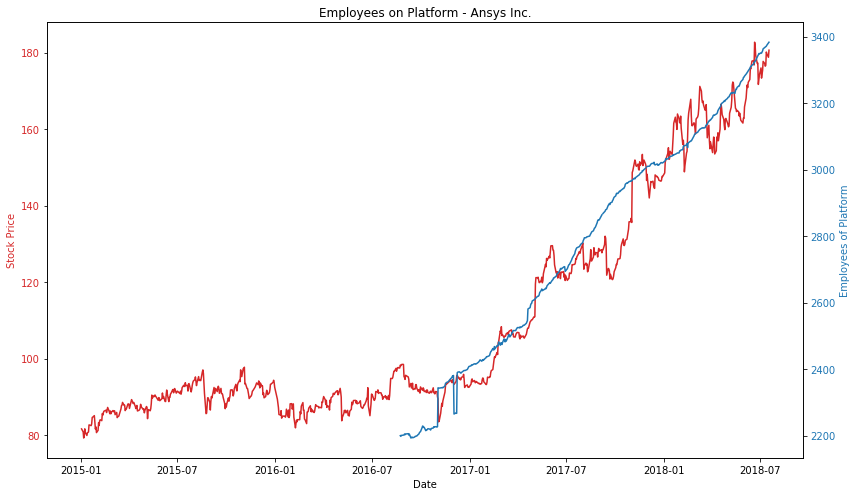

In [22]:
fig, ax1 = plt.subplots(figsize=(12,7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.title.set_text('Employees on Platform - Ansys Inc.')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(df_merged_2['as_of_date'], df_merged_2['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Employees of Platform', color=color)
ax2.plot(df_merged_2['as_of_date'], df_merged_2['employees_on_platform'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.savefig('Employees on Platform Ansys');

For a discussion of the above graph, please visit https://annumveritas-digitaldatatrails.blogspot.com/